In [1]:
import sys

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('D:/Files/_Classes/23-24/F23/CS229B/project/code')
sys.path.append('D:/Files/_Classes/23-24/F23/CS229B/project/code/NDStack/src')

In [3]:
import LSTM_enc_dec
import NDStack_enc_dec

In [4]:
all_X = torch.load(f"../code/all_X.pt")
all_Y = torch.load(f"../code/all_Y.pt")

# Split data into a multiple of 1024 for hardware(?) reasons
train_X = all_X[:,:1024*5,:]
train_Y = all_Y[:,:1024*5,:]

test_X = all_X[:,1024*97:,:]
test_Y = all_Y[:,1024*97:,:]

In [5]:
single_layer_model = LSTM_enc_dec.enc_dec(
                     input_size = 4,
                     output_size = 1,
                     hidden_size = 64,
                     enc_layers = 1,
                     dec_layers = 1,
                     sequence_length = 400,
                     batch_size = 512)

In [6]:
single_layer_model.load_state_dict(torch.load('Single_Layer_4152_model.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

In [7]:
double_layer_model = LSTM_enc_dec.enc_dec(
                     input_size = 4,
                     output_size = 1,
                     hidden_size = 32,
                     enc_layers = 2,
                     dec_layers = 2,
                     sequence_length = 400,
                     batch_size = 512)

In [8]:
double_layer_model.load_state_dict(torch.load('Double_Layer_2552_model.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

In [9]:
NDStack_model = NDStack_enc_dec.enc_dec(
                    input_size = 4,
                    output_size = 1,
                    hidden_size = 32,
                    num_states=2,
                    stack_alphabet_size=2,
                    enc_layers = 1,
                    dec_layers = 1,
                    sequence_length = 400,
                    batch_size = 32,
                    batch_first=True)
NDStack_model.encoder = torch.nn.DataParallel(NDStack_model.encoder)

In [10]:
NDStack_model.load_state_dict(torch.load('NDStack_25_model.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

In [81]:
''.join([{0:'A',1:'U',2:'G',3:'C'}[np.argmax(x).item()] for x in test_X[:,0,:]])

'UAGCUCUCGUGUCCGGCGAGAACUGAGGAGCGCCUCAUUUCACCAUGCCGCUGCGCCCAACGGGGCGGGCGCGGCGGGCACCUGCCCGCGGAUGGGCAUGGCAAGAUUGUCCAACGGACGUUGACCGGCAACUCUGGUGGUCCGACUCGCCGACCUGGAUCUUAGCACCGAGACAUGCAGCCACAUUGUGGCUGUCUCCGAAGAUAUAUUCUCCCUACCGGGUAGAGGAAAUGCAGUAGGUAAAUGGGCACCUGUGCUUUAUGGGCUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'

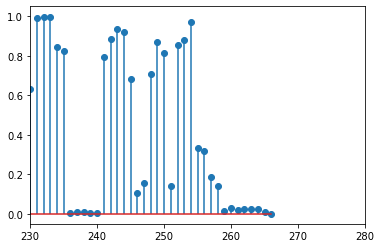

In [95]:
plt.stem(test_Y[:267,0,:].flatten())
plt.xlim(230,280)
plt.show()

In [26]:
single_pred_Y = single_layer_model.predict(test_X[:267,:2,:],1)[:,0,:]
double_pred_Y = double_layer_model.predict(test_X[:267,:2,:],1)[:,0,:]

In [ ]:
NDStack_pred_Y = NDStack_model.predict(test_X[:267,:2,:].transpose(0,1),1).transpose(0,1)[:,0,:]

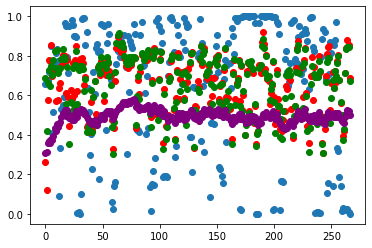

In [27]:
plt.scatter(np.arange(267),test_Y[:267,0,:].flatten())
plt.scatter(np.arange(267),single_pred_Y.flatten(),color='red')
plt.scatter(np.arange(267),double_pred_Y.flatten(),color='green')
plt.scatter(np.arange(267),NDStack_pred_Y.flatten(),color='purple')
# plt.xlim(230,280)
plt.show()

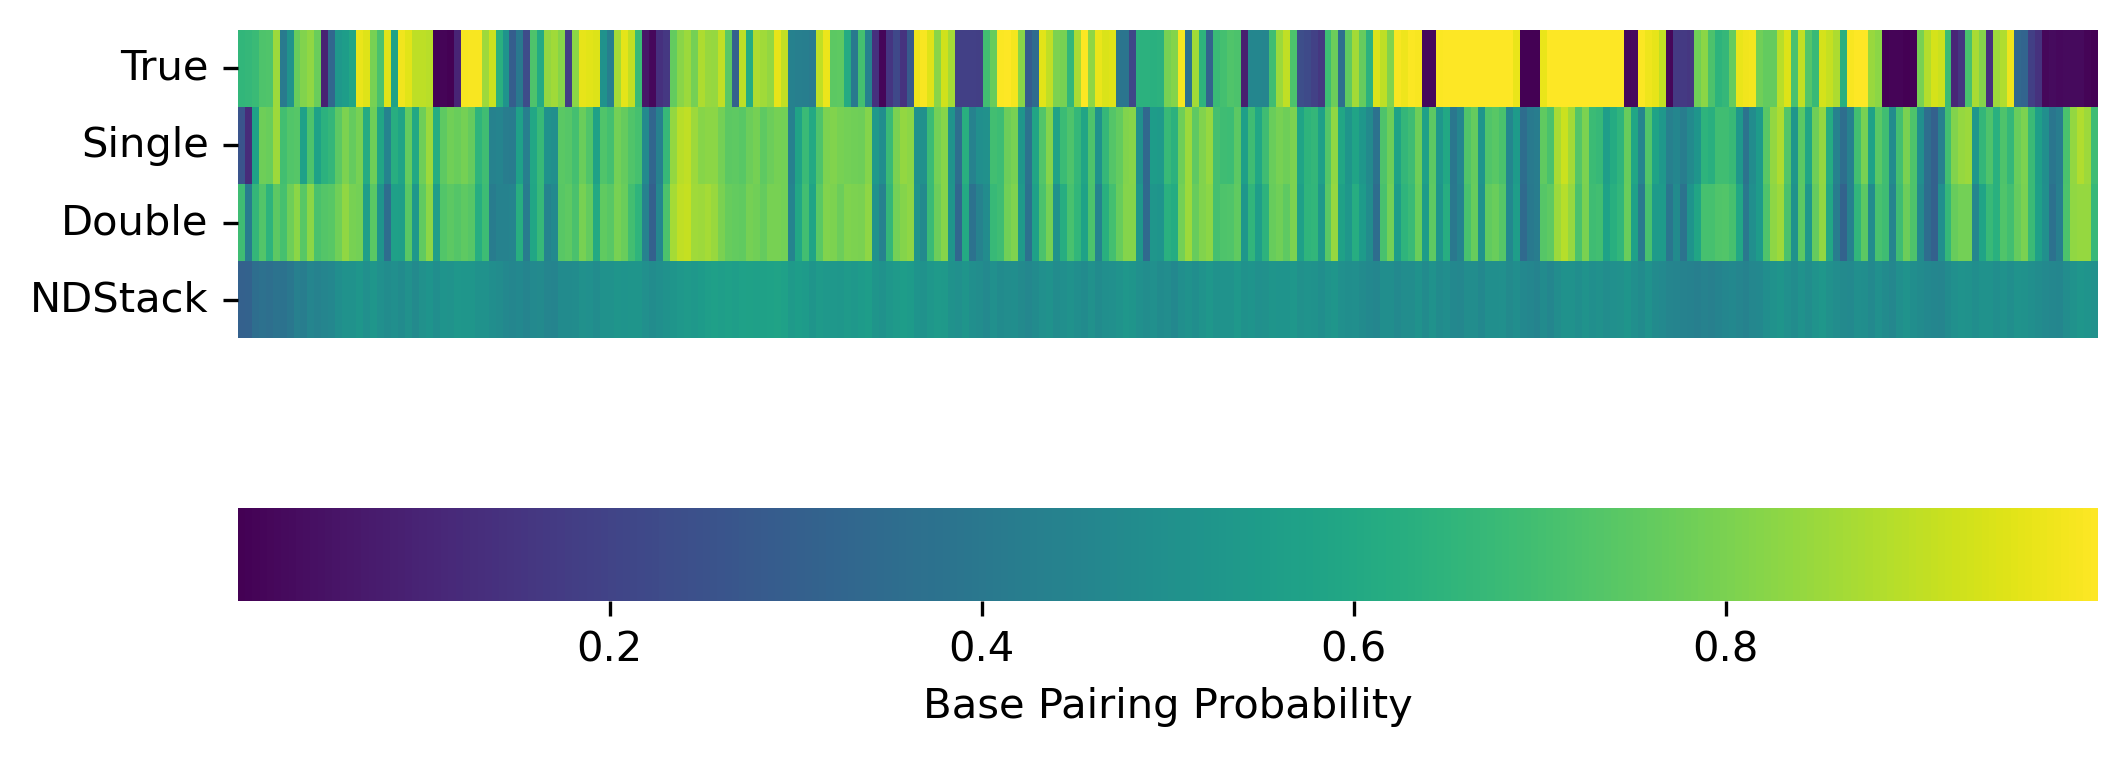

In [50]:
fig,axs = plt.subplots(nrows=2,figsize=(8,3),facecolor='white',dpi=300)
sns.heatmap(
    pd.DataFrame({
    'True':test_Y[:267,0,:].flatten(),
    'Single':single_pred_Y.flatten(),
    'Double':double_pred_Y.flatten(),
    'NDStack':NDStack_pred_Y.flatten()
    }).T,ax=axs[0],cbar_ax = axs[1],cbar_kws={'orientation':'horizontal','label':'Base Pairing Probability'},
     cmap='viridis')

axs[1].set_aspect(.05)

axs[0].tick_params(axis='x',bottom=False,labelbottom=False)

plt.show()
